In [1]:
%run imports.ipynb

Importação concluída, df_final: 


,Idade,Grau de escolaridade,Cidade onde mora,Cidade onde nasceu,Renda,animal_1,animal_2,hobby_1,hobby_2,hobby_3
0,23,Ensino Médio,Diadema,São Paulo,674,Gato,NaN,Skate,Música,Leitura
1,16,Ensino Médio,São Bernardo,São Bernardo,1176,Pássaro,Cachorro,Música,Dança,Desenhar
2,21,Ensino Médio,Santo André,Santo André,2539,Gato,NaN,Dança,Cozinhar,Jogos
3,25,Ensino Médio,Diadema,Diadema,4006,Cachorro,Cobra,Leitura,Jogos,Música
4,28,Graduação Completa,São Paulo,São Bernardo,689,Gato,Aranha,Futebol,Leitura,Correr


# Analisando primeiro a média de idade

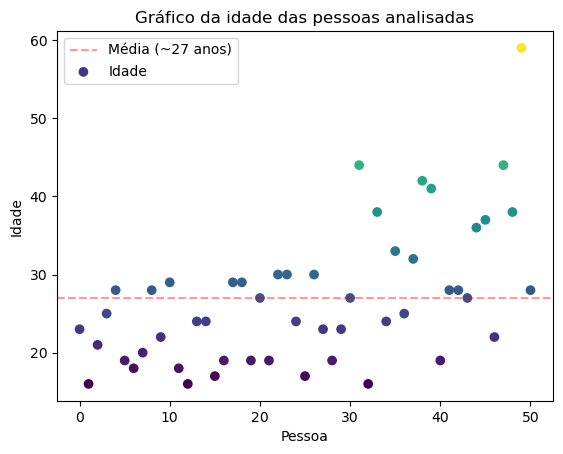

In [2]:
plt.axhline(y=np.nanmean(df_final["Idade"]), color="red", alpha=0.4, linestyle='--', label="Média (~27 anos)")
plt.scatter(df_final.index, df_final["Idade"], label="Idade", c=df_final["Idade"], cmap='viridis')
plt.title("Gráfico da idade das pessoas analisadas")
plt.xlabel("Pessoa")
plt.ylabel("Idade")
plt.legend(fontsize=10)
plt.show()

# Analisando a média de renda

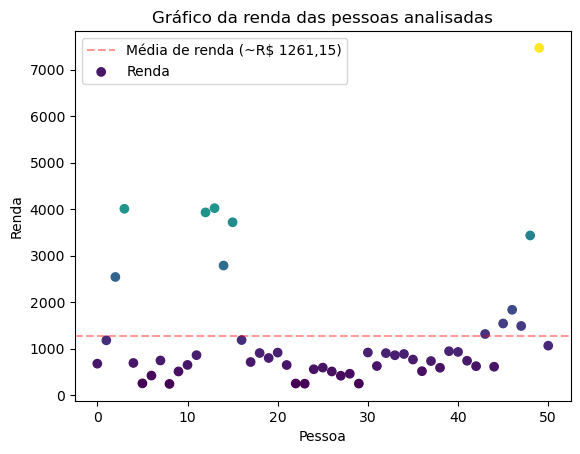

In [3]:
plt.axhline(y=np.nanmean(df_final["Renda"]), color="red", alpha=0.4, linestyle='--', label="Média de renda (~R$ 1261,15)")
plt.scatter(df_final.index, df_final["Renda"], label="Renda", c=df_final["Renda"], cmap='viridis')
plt.title("Gráfico da renda das pessoas analisadas")
plt.xlabel("Pessoa")
plt.ylabel("Renda")
plt.legend(fontsize=10)
plt.show()

# Plot do gráfico de grau de escolaridade

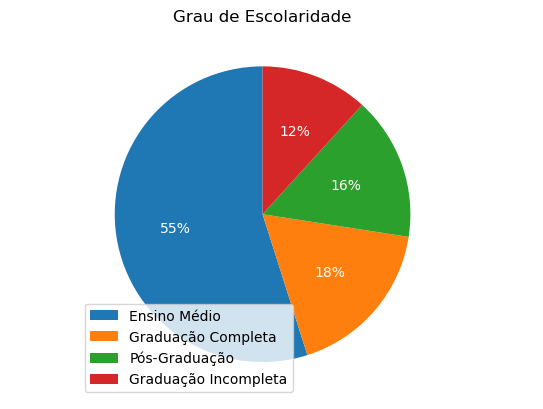

In [4]:
plt.pie(df_final["Grau de escolaridade"].value_counts(), labels=df_final["Grau de escolaridade"].value_counts().index, startangle=90, autopct='%1.f%%', textprops={'color':"w"})
plt.legend(fontsize=10, loc='best')
plt.title("Grau de Escolaridade")
plt.show()

# Plot do gráfico de hobbies

In [5]:
df_hobbies = df_final.melt(id_vars=["Grau de escolaridade"], value_vars=["hobby_1","hobby_2","hobby_3"])
df_hobbies.head()

,Grau de escolaridade,variable,value
0,Ensino Médio,hobby_1,Skate
1,Ensino Médio,hobby_1,Música
2,Ensino Médio,hobby_1,Dança
3,Ensino Médio,hobby_1,Leitura
4,Graduação Completa,hobby_1,Futebol


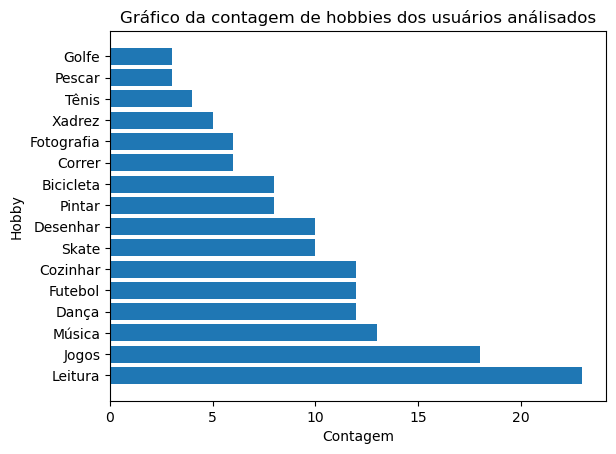

In [6]:
plt.barh(df_hobbies["value"].value_counts().index, df_hobbies["value"].value_counts(), label="Hobby")
plt.title("Gráfico da contagem de hobbies dos usuários análisados")
plt.ylabel("Hobby")
plt.xlabel("Contagem")
plt.show()

# Plot do gráfico de animais de estimação

In [33]:
df_animais = df_final.melt(id_vars=["Renda"], value_vars=["animal_1","animal_2"], value_name="Animal")
df_animais.head()

,Renda,variable,Animal
0,674,animal_1,Gato
1,1176,animal_1,Pássaro
2,2539,animal_1,Gato
3,4006,animal_1,Cachorro
4,689,animal_1,Gato


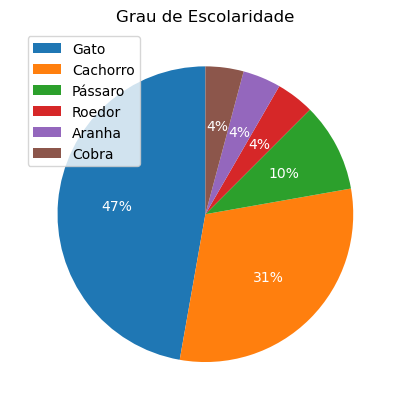

In [8]:
plt.pie(df_animais["value"].value_counts(), labels=df_animais["value"].value_counts().index, startangle=90, autopct='%1.f%%', textprops={'color':"w"})
plt.legend(fontsize=10, loc='best')
plt.title("Grau de Escolaridade")
plt.show()

# Boxplots

In [18]:
melted_hobby = df_final.melt(id_vars=["Renda","Idade"], value_vars=["hobby_1","hobby_2","hobby_3"], value_name="Hobby")
melted_hobby.head()

,Renda,Idade,variable,Hobby
0,674,23,hobby_1,Skate
1,1176,16,hobby_1,Música
2,2539,21,hobby_1,Dança
3,4006,25,hobby_1,Leitura
4,689,28,hobby_1,Futebol


<AxesSubplot:xlabel='Renda', ylabel='Hobby'>

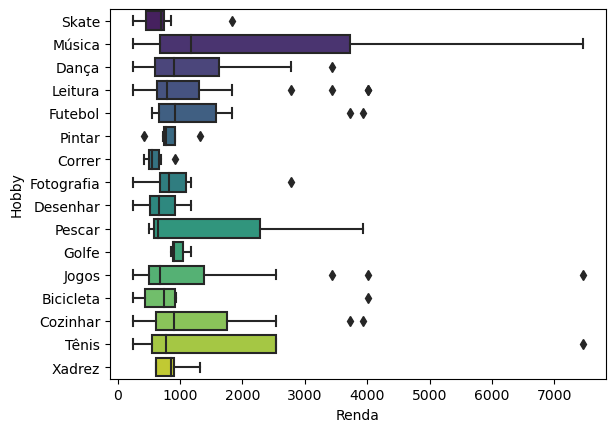

In [26]:
sns.boxplot(y=melted_hobby["Hobby"], x=melted_hobby["Renda"], palette="viridis")

<AxesSubplot:xlabel='Idade', ylabel='Hobby'>

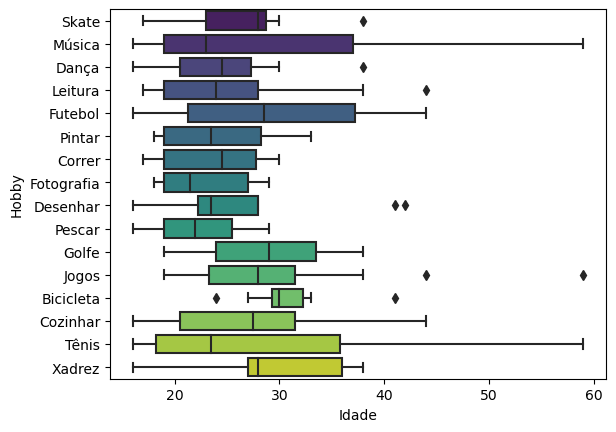

In [31]:
sns.boxplot(y=melted_hobby["Hobby"], x=melted_hobby["Idade"], palette="viridis")

<AxesSubplot:xlabel='Renda', ylabel='Grau de escolaridade'>

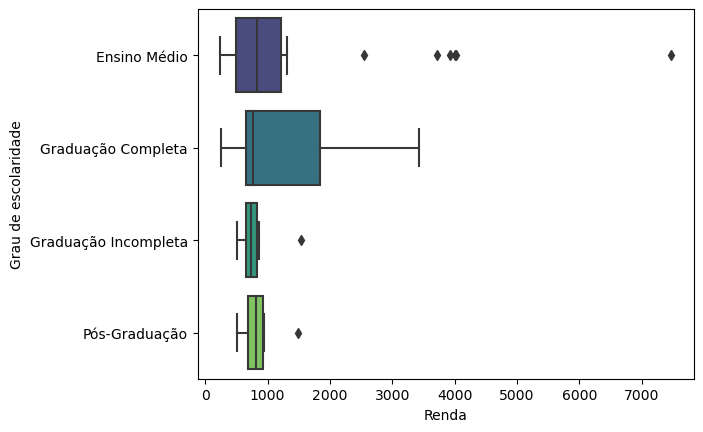

In [29]:
sns.boxplot(y=df_final["Grau de escolaridade"], x=df_final["Renda"], palette="viridis")

<AxesSubplot:xlabel='Animal', ylabel='Renda'>

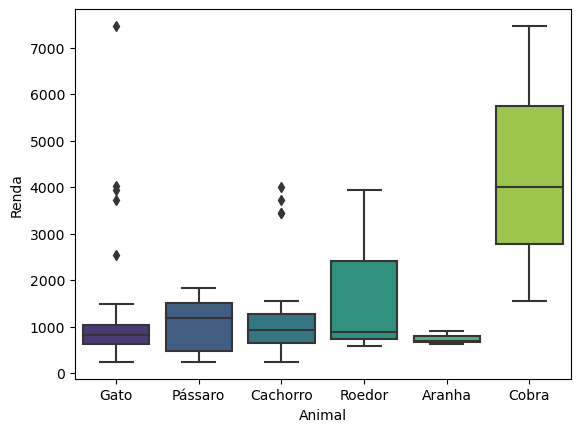

In [34]:
sns.boxplot(y=df_animais["Renda"], x=df_animais["Animal"], palette="viridis")

# Correlações

In [ ]:
# Função para transformar coluna categórica em numérica
def cat_to_num(df: pd.DataFrame, col: str) -> int:
    count = -1
    dic = {}
    for i in df[col]: # Populando dicionário
        if i not in dic.keys():
            count += 1
            dic[i] = count
        
    return df.apply(lambda x: dic[x[col]], axis=1)

### Grau de escolaridade: 0 - Médio, 1 - Graduação Incompleta, 2 - Graduação Completa, 3 - Pós-Graduação

In [ ]:
df_final["Grau de escolaridade"] = df_final.apply(lambda x: 0 if x["Grau de escolaridade"] == "Ensino Médio" else
                                                            1 if x["Grau de escolaridade"] == "Graduação Incompleta" else
                                                            2 if x["Grau de escolaridade"] == "Graduação Completa"
                                                            else 3, axis=1)

### Cidade onde nasceu/Cidade onde mora

In [ ]:
idh_medio = ["Salvador"]
idh_alto = ["Ribeirão Pires","São Vicente","Diadema","Mauá","Recife","Guarulhos","Fortaleza","Osasco","São Paulo"]
idh_muitoalto = ["Vitória","Santos","Natal","Santo André","São Bernardo","Rio de Janeiro"]

df_final["Cidade onde mora"] = df_final.apply(lambda x: 0 if x["Cidade onde mora"] in idh_medio else
                                                        1 if x["Cidade onde mora"] in idh_alto
                                                        else 2, axis=1)

df_final["Cidade onde nasceu"] = df_final.apply(lambda x: 0 if x["Cidade onde nasceu"] in idh_medio else
                                                            1 if x["Cidade onde nasceu"] in idh_alto
                                                            else 2, axis=1)

### Animais

In [ ]:
lista_animais = ["Sem Animal","Pássaro","Aranha","Cobra","Roedor","Gato","Cachorro"]

dict_animal = dict(enumerate(lista_animais))
dict_animal = {v: k for k, v in dict_animal.items()} # Invert

df_final["animal_1"] = df_final.apply(lambda x: dict_animal[x["animal_1"]] if str(x["animal_1"]) != "nan" else 0, axis=1)
df_final["animal_2"] = df_final.apply(lambda x: dict_animal[x["animal_2"]] if str(x["animal_2"]) != "nan" else 0, axis=1)

### Hobbies

In [ ]:
hobbies_baratos = ["Skate","Dança","Pintar","Desenhar","Correr","Xadrez"]
hobbies_medios = ["Música","Leitura","Pescar","Fotografia"]
hobbies_caros = ["Futebol","Jogos","Bicicleta","Tênis","Cozinhar","Golfe"]


df_final["hobby_1"] = df_final.apply(lambda x: 0 if x["hobby_1"] in hobbies_baratos else
                                               1 if x["hobby_1"] in hobbies_medios
                                               else 2, axis=1)

df_final["hobby_2"] = df_final.apply(lambda x: 0 if x["hobby_2"] in hobbies_baratos else
                                               1 if x["hobby_2"] in hobbies_medios
                                               else 2, axis=1)

df_final["hobby_3"] = df_final.apply(lambda x: 0 if x["hobby_3"] in hobbies_baratos else
                                               1 if x["hobby_3"] in hobbies_medios
                                               else 2, axis=1)

### Cálculo das correlações

In [ ]:
df_final["media_animal"] = round((df_final["animal_1"] + df_final["animal_2"]) / 2)
df_final["media_hobby"] = round((df_final["hobby_1"] + df_final["hobby_2"] + df_final["hobby_3"]) / 3)

In [ ]:
df_final.drop(["animal_1","animal_2","hobby_1","hobby_2","hobby_3"], axis=1, inplace=True)

In [ ]:
sns.heatmap(df_final.corr(), cmap="viridis", annot=True)